# PHYS 481 Assignment 4: Ising model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

### Question: Write a function which will calculate all of the energy states and probabilities for an arbitrary number of independent dipoles.  Tabulate the results for $N=3$, $\beta=0.1$ and $B=2$


In [2]:
def Boltzmann(N=3,B=2,beta=0.1):
    """returns possible boltzmann states, energies, and partition function
        args:
            N(int): number of states
            B(int): magnetic field
            beta(float):beta, 1/Temperature
        returns:
            Seq_list(list): list of states
            E(dictionary): values: energy, key: state
            P(dictionary): boltzmann states
            Z(float): partition function"""
    
    #returning variables
    N_comb=2**N
    E={}
    P={}
    Z=0.0


    #sequence list, all possible states
    Seq_list=[]
    for i in np.arange(N_comb):
        Seq_list.append(bin(i)[2:].zfill(N))

    # find energy and register to E
    for i in Seq_list:
        loc_energy=0.0
        for j in i:
            if int(j)==1:
                loc_energy+=1
            elif int(j)==0:
                loc_energy+=-1
        E[i]=-B*loc_energy
    
    #partition function
    for i in Seq_list:
        Z+=np.exp(-beta*E[i])
    
    #boltzmann states found using E and Z
    for i in Seq_list:
        P[i]=np.exp(-beta*E[i])/Z
        
    return Seq_list,E,P,Z


S,E,P,Z=Boltzmann(N=3,B=2,beta=0.1)

Need to check that $$ \sum_k p_k = 1$$

In [3]:
assert 1==sum(P.values())

Now tabulate. Note that spin up is denoted by 1 and spin down is denoted by 0.

In [4]:
s0,s1,s2,s22=(8,10,20,6)
Sequence="Sequence"
Energy="Energy"
Probability="Probability"

print(f"{Sequence:{s0}}      {Energy:{s1}}      {Probability:{s2}}")
for i in S:
    print(f"{i:{s0}} {E[i]:{s1}} {P[i]:{s2}.{s22}}")

Sequence      Energy          Probability         
000             6.0             0.064632
001             2.0            0.0964196
010             2.0            0.0964196
011            -2.0             0.143841
100             2.0            0.0964196
101            -2.0             0.143841
110            -2.0             0.143841
111            -6.0             0.214586


### Question: Write a function which will return a Boltzmann random state for an arbitrary number $N$ of independent dipoles.  Plot the time required to produce the result as a function of $N$.  Discuss your results.

Simply extract the results from the previous question using S (possible states), E (energies of states0, and P (boltzmann states )

In [5]:
def B_rand_state(N=3,B=2,beta=0.1):
    S,E,P,Z=Boltzmann(N=N,B=B,beta=beta)
    state=np.random.choice([i for i in S],p=[j for j in P.values()])
    
    return state

In [6]:
B_rand_state(N=3,B=2,beta=0.1)

'010'

### Measure time

In [7]:
import time

In [8]:
t=[]
for i in np.arange(20):
    begin=time.time()
    
    B_rand_state(N=i)
    
    end=time.time()
    
    
    t.append(end-begin)

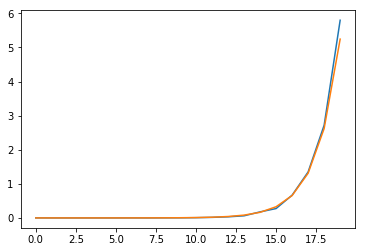

11.10392141342163

In [9]:
def f(x):
    return 2**x

plt.plot(np.arange(20),t)
plt.plot(np.arange(20),f(np.arange(20))/100000)
plt.show()
sum(t)

## Single Dipole

In [10]:
def gen_Metro(dE):
    iter_numb=99
    S=[1]
    T=300

    for i in range(iter_numb):

        if S[-1]==1:
            #S.append(-1)
            P=np.minimum(1,np.exp(-dE/T))
            S.append(np.random.choice([-1,1],p=[P,1-P]))

        elif S[-1]==-1:
            S.append(1)
            #P=np.minimum(1,np.exp(-dE/T))
            #S.append(np.random.choice([-1,1],p=[1-P,P]))
    return S

In [11]:
def gen_Gibbs(dE):
    iter_numb=99
    S=[1]
    T=300

    for i in range(iter_numb):

        P=1/(1+np.exp(-dE/T))
        S.append(np.random.choice([-1,1],p=[1-P,P]))
    return S

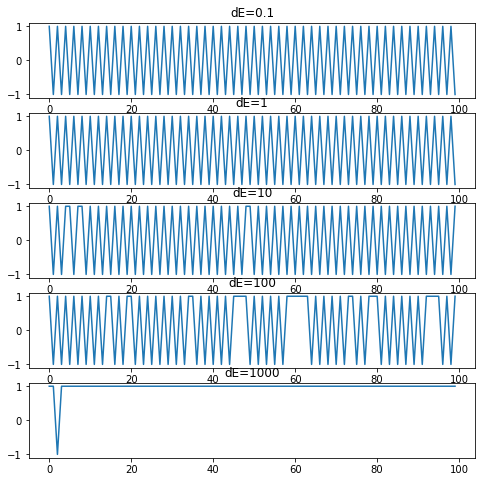

  dE         Number of up states (%) 
  0.1                0.5 
    1                0.5 
   10               0.52 
  100               0.59 
 1000               0.99 


In [12]:
fig,ax=plt.subplots(5,1,figsize=(8,8))
dE_list=[0.1,1,10,100,1000]
Dist=[]

for j,i in enumerate(dE_list):
    S=gen_Metro(i)
    ax[j].plot(np.arange(100),S)
    ax[j].set_title("dE="+str(i))
    
    TF=np.array(S)==1
    TFwhere=np.where(TF)[0]
    Dist.append(TFwhere.shape[0])
plt.show()

dE="dE"
pd="Number of up states (%)"
print(f"  {dE:{10}} {pd:{10}} ")
for i in range(len(Dist)):
    print(f"{dE_list[i]:{5}}{Dist[i]/100:{19}} ")

In [13]:
fig,ax=plt.subplots(5,1,figsize=(8,8))
dE_list=[0.1,1,10,100,1000]
T=2
Dist=[]

for i in dE_list:
    Dist.append(1/(1+np.exp(-(i/T))))
dE="dE"
pd="Number of up states (%)"
print(f"  {dE:{10}} {pd:{10}} ")
for i in range(len(Dist)):
    print(f"{dE_list[i]:{5}}{Dist[i]:{30}} ")

  dE         Number of up states (%) 
  0.1            0.5124973964842103 
    1            0.6224593312018546 
   10            0.9933071490757153 
  100                           1.0 
 1000                           1.0 


## 1D interacting Dipoles

In [25]:


def evolve(ini_state_bin,N,B,T,J):
    
    S=ini_state_bin.copy()

    SW=ini_state_bin.copy()
    SW.append(float(S[0]))
    SW.insert(0,float(S[-1]))
    SWC=list(np.copy(np.array(SW)))
    for i in range(1,len(SW)-1):
        if SW[i]==1:
            current_spin=1
            other_spin=-1
            E_current=-J*SW[i-1]*current_spin  +  -J*current_spin*SW[i+1]+B
            E_other=-J*SW[i-1]*other_spin  + -J*(-1)*SW[i+1]+B
            
        elif SW[i]==-1:
            current_spin=-1
            other_spin=1
            E_current=-J*SW[i-1]*current_spin +  -J*(-1)*SW[i+1]+B
            E_other=-J*SW[i-1]*other_spin  +  -J*other_spin*SW[i+1]+ B

        #E_couple=-J*SW[i-1]*S[i]-J*SW[i]*SW[i+1]

        if E_current>E_other:
            SWC[i]=other_spin
        elif E_current<E_other:
            P=np.min([1.0,np.exp(-(E_other+E_current)/T)])
            SWC[i]=np.random.choice([other_spin,current_spin],p=[P,1-P])
        #elif E_current==E_other:
        #    SWC[i]=np.random.choice([other_spin,current_spin],p=[0.5,0.5])

    return SWC[1:-1]

N=70
B=1
T=9
J=0.5

ini_state=np.random.rand(N)>0.5

ini_state_bin=np.zeros(N)
for i in range(N):
    if ini_state[i]:
        ini_state_bin[i]=1
    if not ini_state[i]:
        ini_state_bin[i]=-1

ini_state_bin=list(ini_state_bin)

state=evolve(ini_state_bin,N,B,T,J)

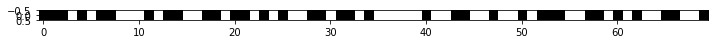

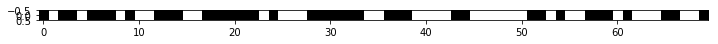

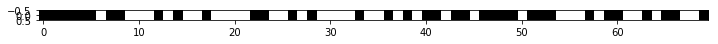

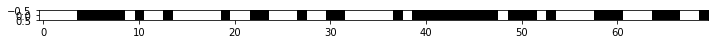

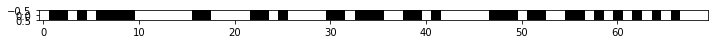

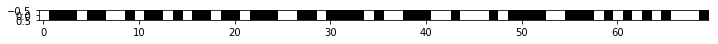

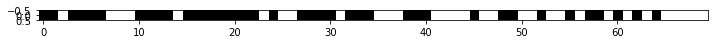

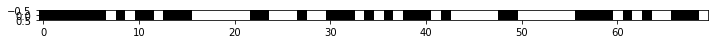

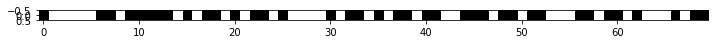

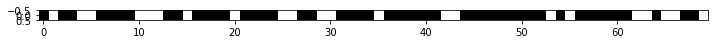

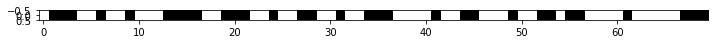

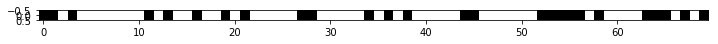

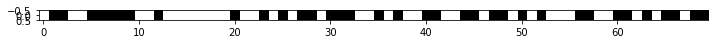

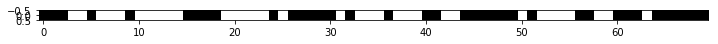

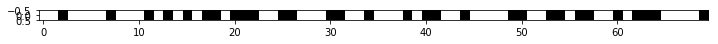

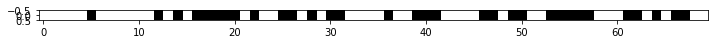

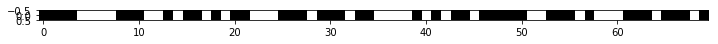

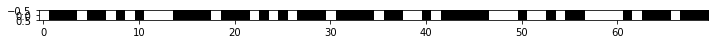

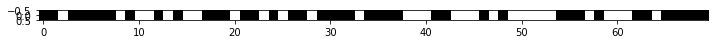

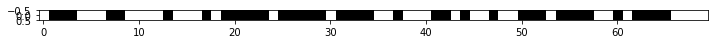

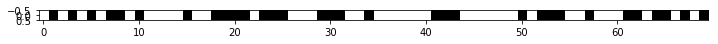

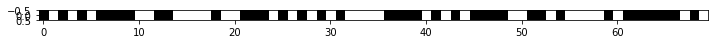

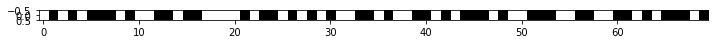

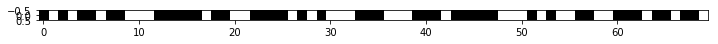

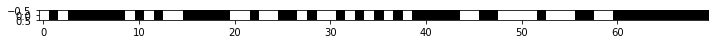

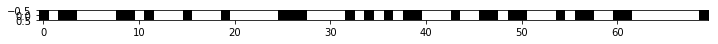

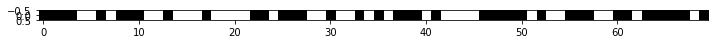

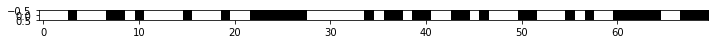

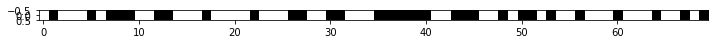

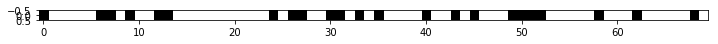

In [26]:
for i in range(30):
    plt.figure(figsize=[12,12])
    state=evolve(state,N,B,T,J)
    plt.imshow(np.array([state]),cmap='gray')
    plt.show()

In [153]:
def Interaction_1d(input_state,N,B,T,J):
    
    
    S=input_state.copy()
    
    SW=input_state.copy()
    SW.append(state[0])
    SW.insert(0,state[-1])
    
    for i in range(1,len(state_wrap)-1):
        E_couple=-J*SW[i]*S[i]-J*SW[i]*SW[i+1]
        
        Eup=E
        Edown=
    

In [215]:
for i in range(100):
    print(i,i/(2**i))

0 0.0
1 0.5
2 0.5
3 0.375
4 0.25
5 0.15625
6 0.09375
7 0.0546875
8 0.03125
9 0.017578125
10 0.009765625
11 0.00537109375
12 0.0029296875
13 0.0015869140625
14 0.0008544921875
15 0.000457763671875
16 0.000244140625
17 0.00012969970703125
18 6.866455078125e-05
19 3.62396240234375e-05
20 1.9073486328125e-05
21 1.0013580322265625e-05
22 5.245208740234375e-06
23 2.7418136596679688e-06
24 1.430511474609375e-06
25 7.450580596923828e-07
26 3.8743019104003906e-07
27 2.0116567611694336e-07
28 1.043081283569336e-07
29 5.4016709327697754e-08
30 2.7939677238464355e-08
31 1.4435499906539917e-08
32 7.450580596923828e-09
33 3.841705620288849e-09
34 1.979060471057892e-09
35 1.0186340659856796e-09
36 5.238689482212067e-10
37 2.6921043172478676e-10
38 1.382431946694851e-10
39 7.09405867382884e-11
40 3.637978807091713e-11
41 1.864464138634503e-11
42 9.549694368615746e-12
43 4.888534022029489e-12
44 2.5011104298755527e-12
45 1.2789769243681803e-12
46 6.536993168992922e-13
47 3.339550858072471e-13
48 1.7053

In [638]:
x=np.arange(10**10,10**11)
y=np.log(np.log(x+x**2)/np.log(x))

MemoryError: 

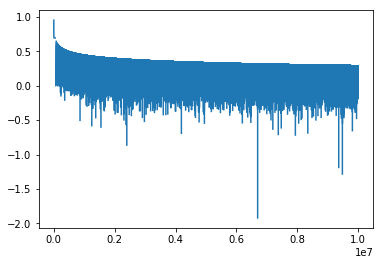

In [635]:
plt.plot(x,y)
plt.show()

In [636]:
help(np.arange)

Help on built-in function arange in module numpy.core.multiarray:

arange(...)
    arange([start,] stop[, step,], dtype=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range <http://docs.python.org/lib/built-in-funcs.html>`_ function,
    but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use ``linspace`` for these cases.
    
    Parameters
    ----------
    start : number, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : number
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and